Sailokesh .. DataScience Final Project

In [50]:
import pandas as pd # importing pandas library with the alias name pd
import numpy as np # importing NumPy library with the alias name np
import matplotlib.pyplot as plt # importing matplotlib.pyplot library with the alias name plt
import seaborn as sns # importing seaborn library with the alias name sns
import math # importing math library
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
%matplotlib inline 

In [51]:
df = pd.read_csv("C:/Users/sailo/Desktop/salaries.csv") # Loading salaries dataset from local storage into a pandas dataframe.

C:\Users\sailo\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (3,4,5,6,12) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [52]:
df

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411,0,400184,NaN,567595.43,567595.43,2011,NaN,San Francisco,NaN
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966,245132,137811,NaN,538909.28,538909.28,2011,NaN,San Francisco,NaN
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739,106088,16452.6,NaN,335279.91,335279.91,2011,NaN,San Francisco,NaN
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916,56120.7,198307,NaN,332343.61,332343.61,2011,NaN,San Francisco,NaN
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134402,9737,182235,NaN,326373.19,326373.19,2011,NaN,San Francisco,NaN
5,6,DAVID SULLIVAN,ASSISTANT DEPUTY CHIEF II,118602,8601,189083,NaN,316285.74,316285.74,2011,NaN,San Francisco,NaN
6,7,ALSON LEE,"BATTALION CHIEF, (FIRE DEPARTMENT)",92492,89062.9,134426,NaN,315981.05,315981.05,2011,NaN,San Francisco,NaN
7,8,DAVID KUSHNER,DEPUTY DIRECTOR OF INVESTMENTS,256577,0,51322.5,NaN,307899.46,307899.46,2011,NaN,San Francisco,NaN
8,9,MICHAEL MORRIS,"BATTALION CHIEF, (FIRE DEPARTMENT)",176933,86362.7,40132.2,NaN,303427.55,303427.55,2011,NaN,San Francisco,NaN
9,10,JOANNE HAYES-WHITE,"CHIEF OF DEPARTMENT, (FIRE DEPARTMENT)",285262,0,17115.7,NaN,302377.73,302377.73,2011,NaN,San Francisco,NaN


In [53]:
df.head() # Tocheck the first five rows of a dataframe.

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411,0,400184,NaN,567595.43,567595.43,2011,NaN,San Francisco,NaN
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966,245132,137811,NaN,538909.28,538909.28,2011,NaN,San Francisco,NaN
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739,106088,16452.6,NaN,335279.91,335279.91,2011,NaN,San Francisco,NaN
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916,56120.7,198307,NaN,332343.61,332343.61,2011,NaN,San Francisco,NaN
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134402,9737,182235,NaN,326373.19,326373.19,2011,NaN,San Francisco,NaN


In [54]:
df.dtypes # To check the datatypes of the dataframe.

Id                    int64
EmployeeName         object
JobTitle             object
BasePay              object
OvertimePay          object
OtherPay             object
Benefits             object
TotalPay            float64
TotalPayBenefits    float64
Year                  int64
Notes               float64
Agency               object
Status               object
dtype: object

We have multiple dataypes. Let's start cleaning the dataset.

In [55]:
df.columns # To check the columns in the dataframe.

Index(['Id', 'EmployeeName', 'JobTitle', 'BasePay', 'OvertimePay', 'OtherPay',
       'Benefits', 'TotalPay', 'TotalPayBenefits', 'Year', 'Notes', 'Agency',
       'Status'],
      dtype='object')

In [56]:
df.describe() # to check the summary statistics of the dataset.

,Id,TotalPay,TotalPayBenefits,Year,Notes
count,148654.000000,148654.000000,148654.000000,148654.000000,0.0
mean,74327.500000,74768.321972,93692.554811,2012.522643,NaN
std,42912.857795,50517.005274,62793.533483,1.117538,NaN
min,1.000000,-618.130000,-618.130000,2011.000000,NaN
25%,37164.250000,36168.995000,44065.650000,2012.000000,NaN
50%,74327.500000,71426.610000,92404.090000,2013.000000,NaN
75%,111490.750000,105839.135000,132876.450000,2014.000000,NaN
max,148654.000000,567595.430000,567595.430000,2014.000000,NaN


In [57]:
df.info() # To check the basic information of the dataframe.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148654 entries, 0 to 148653
Data columns (total 13 columns):
Id                  148654 non-null int64
EmployeeName        148654 non-null object
JobTitle            148654 non-null object
BasePay             148049 non-null object
OvertimePay         148654 non-null object
OtherPay            148654 non-null object
Benefits            112495 non-null object
TotalPay            148654 non-null float64
TotalPayBenefits    148654 non-null float64
Year                148654 non-null int64
Notes               0 non-null float64
Agency              148654 non-null object
Status              38119 non-null object
dtypes: float64(3), int64(2), object(8)
memory usage: 14.7+ MB


In [58]:
df.shape # to check the shape of the dataframe.

(148654, 13)

We have 148654 instances and 13 columns.

# Data Cleaning

In [59]:
df.isnull().sum() # To check the missing values in the dataframe.

Id                       0
EmployeeName             0
JobTitle                 0
BasePay                605
OvertimePay              0
OtherPay                 0
Benefits             36159
TotalPay                 0
TotalPayBenefits         0
Year                     0
Notes               148654
Agency                   0
Status              110535
dtype: int64

# Handling Missing values

We have many missing values in many columns. Let us deal with the missing values. WE can done in many ways. 
1) Replace the missing values with their mean for numerical values.
2) Dropping observations
3) Replace NaN with 0 in continous variables
4) Creating new categories to replace in categorical variables

In [60]:
df["BasePay"] = df["BasePay"].convert_objects(convert_numeric=True)

C:\Users\sailo\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  if __name__ == '__main__':


In [61]:
meanBasePay = df["BasePay"].mean()

In [62]:
df["BasePay"] = df["BasePay"].fillna(meanBasePay)

In [63]:
df["OvertimePay"] = df["OvertimePay"].convert_objects(convert_numeric=True)

C:\Users\sailo\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  if __name__ == '__main__':


In [64]:
meanOvertime = df["OvertimePay"].mean()

In [65]:
df["OvertimePay"] = df["OvertimePay"].fillna(meanOvertime)

In [66]:
df["Benefits"] = df["Benefits"].convert_objects(convert_numeric=True)

C:\Users\sailo\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  if __name__ == '__main__':


In [67]:
meanBenefits = df["Benefits"].mean()

In [68]:
df["Benefits"] = df["Benefits"].fillna(meanBenefits)

In [69]:
df["OtherPay"] = df["OtherPay"].convert_objects(convert_numeric=True)

C:\Users\sailo\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  if __name__ == '__main__':


In [70]:
meanOther = df["OtherPay"].mean()

In [71]:
df["OtherPay"] = df["OtherPay"].fillna(meanOther)

In [72]:
df.isnull().sum()

Id                       0
EmployeeName             0
JobTitle                 0
BasePay                  0
OvertimePay              0
OtherPay                 0
Benefits                 0
TotalPay                 0
TotalPayBenefits         0
Year                     0
Notes               148654
Agency                   0
Status              110535
dtype: int64

In [73]:
df.columns

Index(['Id', 'EmployeeName', 'JobTitle', 'BasePay', 'OvertimePay', 'OtherPay',
       'Benefits', 'TotalPay', 'TotalPayBenefits', 'Year', 'Notes', 'Agency',
       'Status'],
      dtype='object')

# Exploratory Data Analysis.

EDA for BasePay

In [74]:
df[df.BasePay.isnull()]

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status


no null values

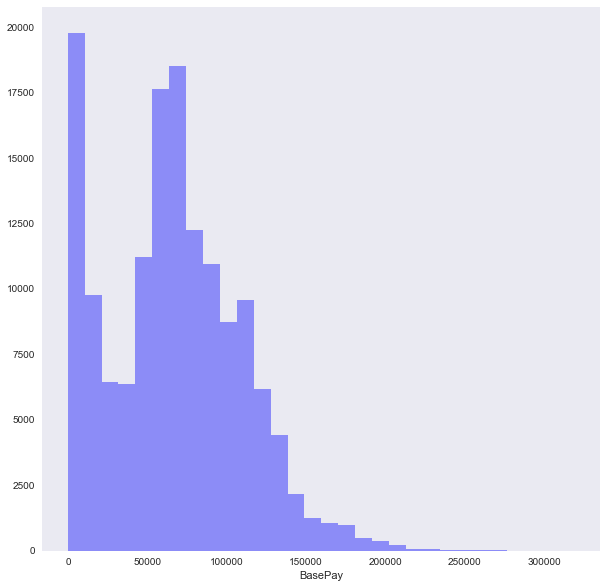

In [75]:
sns.set(rc={"figure.figsize": (10, 10)},style='dark')
sns.distplot(df["BasePay"],hist=True,kde=False,color='b',bins=30)

In [76]:
df.BasePay.describe()

count    148654.000000
mean      66325.448841
std       42676.946745
min        -166.010000
25%       33847.017500
50%       65092.190000
75%       94605.740000
max      319275.010000
Name: BasePay, dtype: float64

In [77]:
df.BasePay.value_counts()

0.000000         1298
66325.448841      609
54703.000000      338
55026.000000      297
48472.400000      210
65448.000000      153
68391.000000      152
121068.000000     152
88374.000000      151
51492.800000      143
94191.000000      137
116584.000000     127
105934.660000     117
105934.670000     114
67948.000000      112
51502.000000      110
63995.000000      103
60206.600000      101
86840.000000       95
105934.650000      94
72144.000000       86
116956.710000      85
81830.000000       84
18594.000000       82
79222.000000       82
88062.000000       82
112703.740000      79
65055.000000       78
83160.000000       77
61128.000000       77
                 ... 
72536.060000        1
63101.010000        1
51010.320000        1
84747.030000        1
74332.520000        1
1607.000000         1
53546.010000        1
20487.140000        1
113401.430000       1
47679.540000        1
71830.700000        1
85489.000000        1
79780.530000        1
65277.860000        1
72043.8000

EDA for OvertimePay

In [78]:
df[df.OvertimePay.isnull()]

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status


no null values

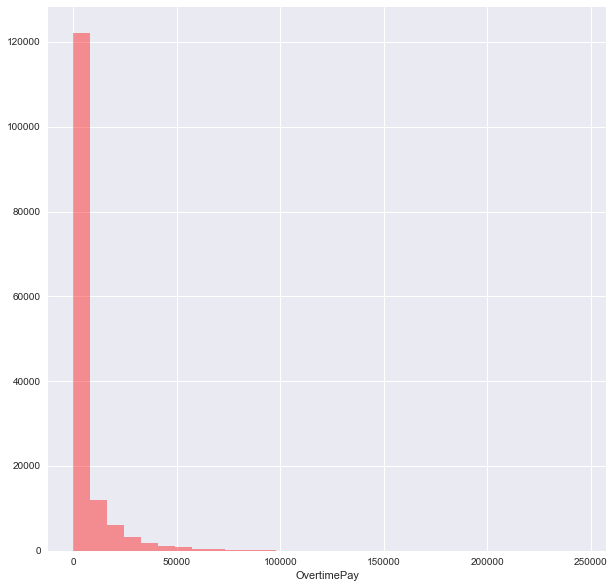

In [79]:
sns.set(rc={"figure.figsize": (10, 10)})
sns.distplot(df["OvertimePay"],hist=True,kde=False,color='r',bins=30)

In [80]:
df.OvertimePay.describe()

count    148654.000000
mean       5066.059886
std       11454.226449
min          -0.010000
25%           0.000000
50%           0.000000
75%        4658.667500
max      245131.880000
Name: OvertimePay, dtype: float64

In [81]:
df.OvertimePay.value_counts()

0.00        77321
10.68          41
681.23         41
152.13         38
1314.78        27
167.18         25
278.96         25
997.68         20
76.32          19
924.30         14
752.85         14
276.94         14
288.34         14
1099.08        14
318.48         14
223.17         14
1258.02        13
221.55         13
1536.25        12
1690.55        12
251.70         12
1540.50        12
1016.01        12
1743.71        12
431.10         11
1085.78        11
2692.50        11
3081.00        11
1486.54        11
283.86         11
            ...  
26020.84        1
1383.54         1
22737.94        1
116.28          1
35767.07        1
10844.16        1
5123.68         1
802.30          1
8173.90         1
2686.16         1
4898.77         1
5849.88         1
1969.53         1
392.34          1
206.25          1
4676.40         1
10784.59        1
10378.56        1
3076.65         1
6276.69         1
4515.16         1
4535.75         1
1018.45         1
6124.40         1
1629.76   

EDA for Benifits

In [82]:
df[df.Benefits.isnull()]

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status


no null values

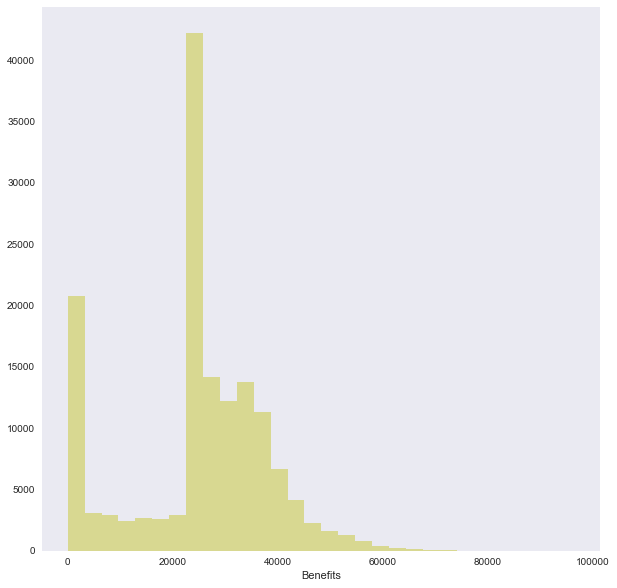

In [83]:
sns.set(rc={"figure.figsize": (10, 10)},style='dark')
sns.distplot(df["Benefits"],hist=True,kde=False,color='y',bins=30)

In [84]:
df.Benefits.describe()

count    148654.000000
mean      25007.893151
std       13398.411899
min         -33.890000
25%       22342.297500
50%       25007.893151
75%       33468.980000
max       96570.660000
Name: Benefits, dtype: float64

In [85]:
df.Benefits.value_counts()

25007.893151    36163
0.000000         1734
7959.180000       348
4659.360000       107
25699.200000       83
37055.220000       82
27052.980000       75
37025.180000       60
36097.330000       57
34150.930000       53
38280.390000       51
35884.330000       51
39396.660000       49
25954.760000       48
36412.570000       47
35445.100000       44
7464.700000        43
26642.480000       43
37040.200000       43
41406.590000       40
41858.980000       40
35732.230000       39
41366.100000       38
450.370000         37
18323.880000       36
7065.100000        36
35134.880000       35
24669.820000       35
24682.650000       35
35703.870000       35
                ...  
29946.500000        1
31462.730000        1
2147.380000         1
26819.460000        1
28435.630000        1
44803.030000        1
34606.730000        1
40668.240000        1
51372.930000        1
10876.500000        1
36112.200000        1
25574.260000        1
6062.850000         1
53344.080000        1
34898.8200

EDA for OtherPay

In [86]:
df[df.OtherPay.isnull()]

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status


no null values

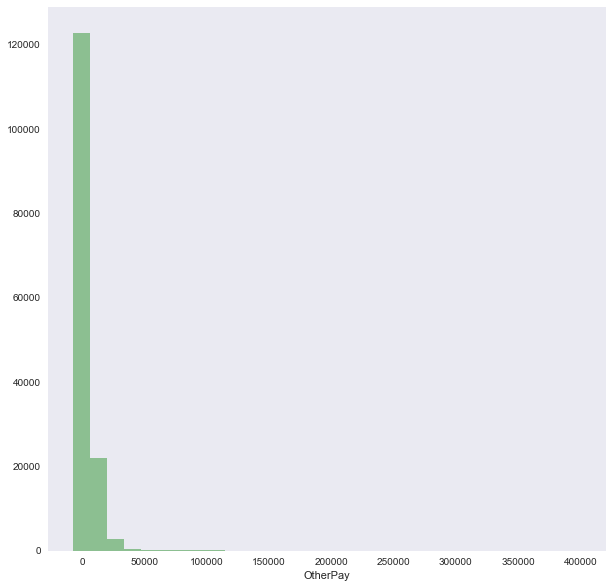

In [87]:
sns.set(rc={"figure.figsize": (10, 10)},style='dark')
sns.distplot(df["OtherPay"],hist=True,kde=False,color='g',bins=30)

In [88]:
df.OtherPay.value_counts()

0.00        41600
624.00       2092
250.00        907
648.00        739
3486.00       516
312.50        339
200.00        308
1250.00       256
1000.00       226
874.00        215
550.00        215
1040.00       211
1500.00       196
500.00        170
1312.50       158
100.00        147
600.00        139
480.00        125
40.00         125
120.00        120
125.00        119
960.00        114
60.00         113
1480.00       106
1200.00        97
1080.00        95
1540.00        93
1460.00        90
10.00          85
624.01         82
            ...  
3277.38         1
10928.16        1
10959.84        1
16772.80        1
783.85          1
2474.26         1
21725.50        1
71.44           1
12801.58        1
4665.49         1
4070.98         1
1826.58         1
2307.63         1
2903.94         1
759.43          1
7772.14         1
8706.83         1
623.04          1
2732.79         1
2739.21         1
7656.41         1
18590.79        1
4353.29         1
8666.87         1
6042.15   

We performed the EDA and now let us setup the dataframe in a shape so that we can apply a model.

In [89]:
df.head()

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.00,400184.25,25007.893151,567595.43,567595.43,2011,NaN,San Francisco,NaN
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,25007.893151,538909.28,538909.28,2011,NaN,San Francisco,NaN
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.60,25007.893151,335279.91,335279.91,2011,NaN,San Francisco,NaN
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.00,56120.71,198306.90,25007.893151,332343.61,332343.61,2011,NaN,San Francisco,NaN
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.60,9737.00,182234.59,25007.893151,326373.19,326373.19,2011,NaN,San Francisco,NaN


In [90]:
df.columns

Index(['Id', 'EmployeeName', 'JobTitle', 'BasePay', 'OvertimePay', 'OtherPay',
       'Benefits', 'TotalPay', 'TotalPayBenefits', 'Year', 'Notes', 'Agency',
       'Status'],
      dtype='object')

The columns ID, EmployeeName, Notes,Agency, from the data frame

In [91]:
df= df.drop(["Id","EmployeeName","Notes","Agency"],axis=1)

In [92]:
df.isnull().sum()

JobTitle                 0
BasePay                  0
OvertimePay              0
OtherPay                 0
Benefits                 0
TotalPay                 0
TotalPayBenefits         0
Year                     0
Status              110535
dtype: int64

For a machine learning algorithm to perform well we need to input them the numerical Variable. So let us convert the two categorical variable JobTitle and Status to numerical varibles for that first let us write a function to replace missing values as well as to create dummy valus for the variables.

In [93]:
category = ["JobTitle","Status"]

for variable in category:
    df[variable].fillna("Missing",inplace=True)
    dummies=pd.get_dummies(df[variable],prefix=variable)
    df =pd.concat([df,dummies],axis=1)
    df.drop([variable],axis=1,inplace=True)

In [94]:
y = df.pop("TotalPay")

In [95]:
X_train,X_test,y_train,y_test = train_test_split(df,y,test_size=0.3,random_state=101)

In [96]:
lmodel = LinearRegression()

In [97]:
lmodel.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [98]:
print(lmodel.intercept_)

11835.1498316


In [99]:
lmodel.coef_

array([ -5.93995288e-14,   1.98248085e-11,   4.13944434e-11, ...,
        -2.96192233e+00,  -2.96192212e+00,  -2.96192260e+00])

In [100]:
X_train.columns

Index(['BasePay', 'OvertimePay', 'OtherPay', 'Benefits', 'TotalPayBenefits',
       'Year', 'JobTitle_ACCOUNT CLERK', 'JobTitle_ACCOUNTANT',
       'JobTitle_ACCOUNTANT INTERN', 'JobTitle_ACPO,JuvP, Juv Prob (SFERS)',
       ...
       'JobTitle_Worker's Comp Supervisor 1',
       'JobTitle_Worker's Compensation Adjuster',
       'JobTitle_X-RAY LABORATORY AIDE', 'JobTitle_X-Ray Laboratory Aide',
       'JobTitle_YOUTH COMMISSION ADVISOR, BOARD OF SUPERVISORS',
       'JobTitle_Youth Comm Advisor', 'JobTitle_ZOO CURATOR', 'Status_FT',
       'Status_Missing', 'Status_PT'],
      dtype='object', length=2168)

In [101]:
pd.DataFrame(lmodel.coef_,df.columns,columns=['coeff'])

,coeff
BasePay,-5.939953e-14
OvertimePay,1.982481e-11
OtherPay,4.139444e-11
Benefits,-1.000000e+00
TotalPayBenefits,1.000000e+00
Year,1.251410e-07
JobTitle_ACCOUNT CLERK,1.317570e+04
JobTitle_ACCOUNTANT,1.317570e+04
JobTitle_ACCOUNTANT INTERN,1.317570e+04
"JobTitle_ACPO,JuvP, Juv Prob (SFERS)",-1.293445e+00


Here I am going to perform Linear Regression at first and comparing the results with the Random forest regressor

In [105]:
prediction = lmodel.predict(X_test)

In [106]:
prediction

array([ 112118.26000004,   79907.71000069,   29161.97000047, ...,
         10474.10000151,    2234.6900001 ,  100979.74000065])

In [107]:
y_test

82208     112118.26
89725      79907.71
102402     29161.97
23995      52171.94
8081      106792.60
16132      73864.28
49877      84331.00
103653     22296.63
126661     80526.97
85285      95403.05
100814     36653.83
103861     14297.61
68029      12960.00
18522      67304.32
7420      111003.93
144023      8340.71
95684      61947.51
7950      107529.10
36720     184827.85
92074      73368.20
36821     181209.00
23469      53539.40
11523      90845.53
54912      66666.76
134901     54157.85
93803      77180.76
6360      116685.41
132541     61801.50
137416     48368.65
89137      76046.12
            ...    
33278       5092.94
61754      49783.20
94282      65445.98
66541      15349.12
84800      96749.04
135379     53675.13
55044      68358.02
148096       716.74
115099    134755.23
4961      124448.07
65614      19846.53
145675      5209.20
130411     66023.42
64246      41961.57
117164    115859.19
54027      79292.55
135329     52851.01
134275     58621.01
73571     209835.41


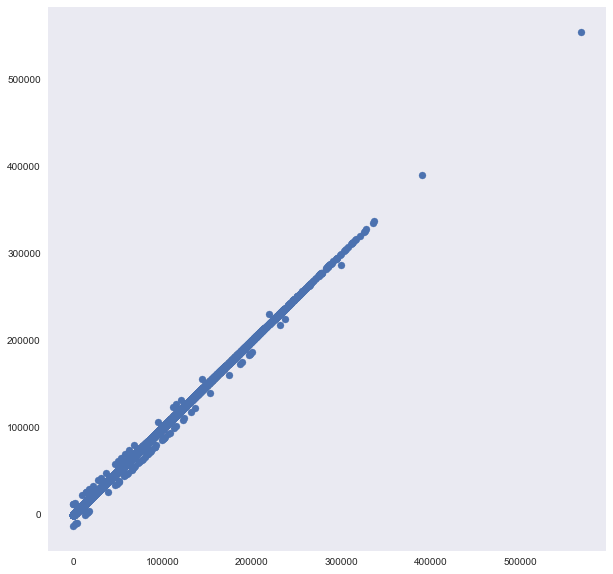

In [108]:
plt.scatter(y_test,prediction)

In [109]:
metrics.mean_absolute_error(y_test,prediction)

26.151934229389024

In [110]:
metrics.mean_squared_error(y_test,prediction)

335909.63586562657

In [111]:
np.sqrt(metrics.mean_squared_error(y_test,prediction))

579.57711813496098

#    Random Forest Regressor Model.
         

In [112]:
model = RandomForestRegressor(n_estimators=100,oob_score=True,n_jobs=-1,random_state=50,max_features="auto",min_samples_split=2)
model.fit(df,y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=100, n_jobs=-1, oob_score=True, random_state=50,
           verbose=0, warm_start=False)

In [113]:
prediction1 = model.predict(X_test)

In [114]:
prediction1

array([ 112202.5397,   79778.9414,   29221.6172, ...,   10571.486 ,
          2282.8377,  100967.4146])

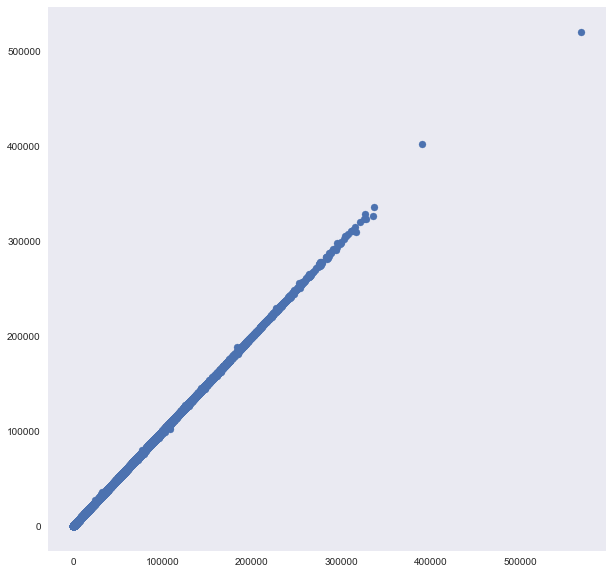

In [115]:
plt.scatter(y_test,prediction1)

In [116]:
metrics.mean_absolute_error(y_test,prediction1)

48.198108563337726

In [117]:
metrics.mean_squared_error(y_test,prediction1)

74352.156113026533

In [118]:
np.sqrt(metrics.mean_squared_error(y_test,prediction1))

272.67591773573724

In [119]:
model.oob_score_

0.99984803408802947

From the conclusion, we came to know that Random forest regressor gives good results than Linear regressor because of it's predictive capability.